In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer

# sklearn libraries
from sklearn.pipeline                import Pipeline
from sklearn.linear_model            import LogisticRegression
from sklearn.naive_bayes             import MultinomialNB
from sklearn.ensemble                import RandomForestClassifier
from sklearn.model_selection         import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df1 =pd.read_csv('data/nfl.csv')
df2 =pd.read_csv('data/ncaa.csv')

In [3]:
df1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,subreddit_subscribers,created_utc,num_crossposts,media,is_video,url_overridden_by_dest,call_to_action,author_cakeday,link_flair_template_id,media_metadata
0,NaN,nfl,[Cincinnati Bengals](/r/bengals#away) [at](#at...,t2_plq2w,False,NaN,0,False,Post Game Thread: Cincinnati Bengals (2-3) at ...,"[{'e': 'text', 't': 'Post Game Thread'}]",...,3015663,1.665372e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
1,NaN,nfl,[Cincinnati Bengals](/r/bengals#away) [at](#at...,t2_plq2w,False,NaN,0,False,Game Thread: Cincinnati Bengals (2-2) at Balti...,"[{'e': 'text', 't': 'Game Thread'}]",...,3015663,1.665359e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN
2,NaN,nfl,NaN,t2_gbzf7q,False,NaN,0,False,[Highlight] Cardinals miss the field goal and ...,"[{'e': 'text', 't': 'Highlight'}]",...,3015663,1.665358e+09,0,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/lowlightheaven/status/1579...,NaN,NaN,NaN,NaN
3,NaN,nfl,NaN,t2_s82n19zx,False,NaN,0,False,[Highlight] Roughing the passer called. Stunning.,[],...,3015663,1.665346e+09,1,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/MentionPod/status/15792005...,NaN,NaN,NaN,NaN
4,NaN,nfl,NaN,t2_gbzf7q,False,NaN,0,False,[Stat Muse] Cooper Rush is 5-0 as a starter. O...,[],...,3015663,1.665358e+09,0,{'oembed': {'provider_url': 'https://twitter.c...,False,https://twitter.com/statmuse/status/1579250511...,NaN,NaN,NaN,NaN


In [4]:
df2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media,is_video,call_to_action,crosspost_parent_list,crosspost_parent,poll_data,author_cakeday,is_gallery,media_metadata,gallery_data
0,NaN,NCAA,NaN,t2_dz9aci0e,False,NaN,0,False,Mental Health Advisory Group to meet for first...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NCAA,NaN,t2_rnqvk,False,NaN,0,False,Early favorite emerges in Wisconsin Badgers He...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NCAA,"As promised, as i already did NCAA 2K's for ol...",t2_22akoaxt,False,NaN,0,False,NCAA 2K23 - how to download and install! ENJOY!,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NCAA,anthroscopic* \n\nI'm hoping to hear from athl...,t2_9ku39crx,False,NaN,0,False,Does arthroscopic surgery for a shoulder injur...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NCAA,NaN,t2_gohw27kc,False,NaN,0,False,Air Force football program put on probation by...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.shape

(976, 113)

In [6]:
# append two dataframe into one for data training
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)
df.shape

(1977, 114)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Columns: 114 entries, approved_at_utc to gallery_data
dtypes: bool(28), float64(24), int64(10), object(52)
memory usage: 1.4+ MB


In [8]:
df.subreddit.value_counts()

nfl     1001
NCAA     976
Name: subreddit, dtype: int64

In [9]:
#rename column
df.rename(columns = {'subreddit':'is_nfl'}, inplace = True)
# Create label column
df['is_nfl'] = df['is_nfl'].map({'NCAA':0, 'nfl':1})

In [10]:
df.is_nfl.value_counts()

1    1001
0     976
Name: is_nfl, dtype: int64

In [11]:
df = df[['is_nfl','author_fullname','title']].copy()

In [12]:
df.shape

(1977, 3)

In [13]:
df.isnull().sum()

is_nfl              0
author_fullname    32
title               0
dtype: int64

In [14]:
df.dropna(axis =0, inplace=True)
df.isnull().sum().sum()

0

In [15]:
df.shape

(1945, 3)

In [16]:
df.drop_duplicates(subset='title', keep='first', inplace=True, ignore_index=True)

In [17]:
df.shape

(1582, 3)

#### Lower casing

In [35]:
def lower_case(df):
    df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['title'].head())

In [36]:
lower_case(df)

0    post thread: cincinnati bengals (2-3) at balti...
1    thread: cincinnati bengals (2-2) at baltimore ...
2    [highlight] cardinals miss the field goal and ...
3    [highlight] roughing the passer called. stunning.
4    [stat muse] cooper rush is 5-0 as a starter. o...
Name: title, dtype: object


In [49]:
def punctuation_removal(df):
    df['title'] = df['title'].str.replace('[^\w\s]','')
    print(df['title'].head())

In [50]:
punctuation_removal(df)

0    post thread cincinnati bengals 23 at baltimore...
1    thread cincinnati bengals 22 at baltimore rave...
2    highlight cardinals miss the field goal and ea...
3        highlight roughing the passer called stunning
4    stat muse cooper rush is 50 as a starter only ...
Name: title, dtype: object


C:\Users\science01\AppData\Local\Temp\ipykernel_26648\827688525.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('[^\w\s]','')


### Exploring most common words

In [51]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')
# Fit and transform the vectorizer on our corpus.
df_cvec= cvec.fit_transform(df['title'])
#putting results into dataframe
df_cvec = pd.DataFrame(df_cvec.todense(), columns=cvec.get_feature_names_out())

In [52]:
df_cvec

,00,02,0200,021,031,04,07,0for4,0for6,10,...,zadarius,zaga,zaire,zappe,zero,zhao,zone,zoo,zoom,zrebiec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_cvec_series = pd.Series(df_cvec.sum())
df_cvec_series 

00          2
02          1
0200        1
021         1
031         1
           ..
zhao        1
zone       10
zoo         1
zoom        1
zrebiec     2
Length: 4677, dtype: int64

In [54]:
df1_cvec= cvec.fit_transform(df1['title'])
df1_cvec = pd.DataFrame(df1_cvec.todense(), columns=cvec.get_feature_names_out())

In [55]:
df2_cvec= cvec.fit_transform(df2['title'])
df2_cvec = pd.DataFrame(df2_cvec.todense(), columns=cvec.get_feature_names_out())

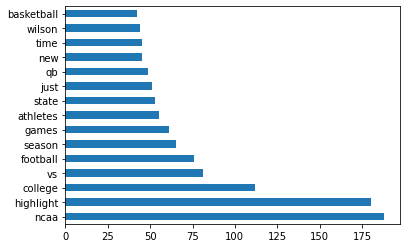

In [56]:
#Most common words
df_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

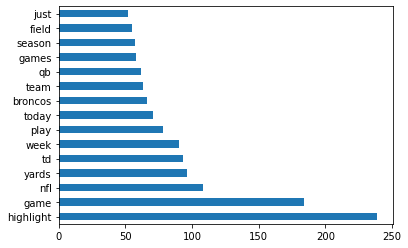

In [57]:
#Most common words in nfl subreddit
df1_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [58]:
freq1 = pd.Series(df1_cvec.sum().sort_values(ascending =False)[:10])

In [59]:
freq1

highlight    239
game         184
nfl          108
yards         96
td            93
week          90
play          78
today         71
broncos       66
team          63
dtype: int64

In [60]:
freq1 = list(freq1.index)
freq1 

['highlight',
 'game',
 'nfl',
 'yards',
 'td',
 'week',
 'play',
 'today',
 'broncos',
 'team']

In [61]:
def frequent_words_removal(df):    
    df['title'] = df['title'].str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
    print(df['title'].head())

In [62]:
frequent_words_removal(df)

0    post thread cincinnati bengals 23 at baltimore...
1    thread cincinnati bengals 22 at baltimore rave...
2    cardinals miss the field goal and eagles stay ...
3                  roughing the passer called stunning
4    stat muse cooper rush is 50 as a starter only ...
Name: title, dtype: object


In [63]:
df.title.head(30)

0     post thread cincinnati bengals 23 at baltimore...
1     thread cincinnati bengals 22 at baltimore rave...
2     cardinals miss the field goal and eagles stay ...
3                   roughing the passer called stunning
4     stat muse cooper rush is 50 as a starter only ...
5     tucker kicks the winner for the ravens and the...
6     tucker just called himself a system kicker and...
7     mosher nfc east through 5 eagles 50 cowboys 41...
8     michael lopez using nextgenstats ball tracking...
9        justin tucker lets the world know whos the man
10    mayfield makes a big mistake and the 49ers pic...
11    shannon sharpe i trust tuckers foot more than ...
12    brett kollman on twitter reminder that the lea...
13                          mooney with a 1 handed snag
14    benjamin solak the nfc east is a collective 14...
15    buffalo billspittsburgh your friendly neighbor...
16    br gridiron the defender grabbed the quarterba...
17    meirov mindblowing stat on the broadcast a

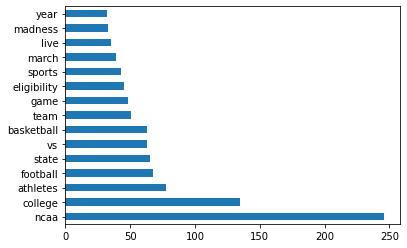

In [64]:
#Most common words in ncaa subreddit
df2_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [65]:
freq2 = pd.Series(df2_cvec.sum().sort_values(ascending =False)[:10])
freq2 

ncaa           246
college        135
athletes        78
football        68
state           65
vs              63
basketball      63
team            51
game            48
eligibility     45
dtype: int64

In [66]:
freq2 = list(freq2.index)
freq2 

['ncaa',
 'college',
 'athletes',
 'football',
 'state',
 'vs',
 'basketball',
 'team',
 'game',
 'eligibility']

In [67]:
def frequent_words_removal2(df):    
    df['title'] = df['title'].str.lower().apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
    print(df['title'].head())

In [68]:
frequent_words_removal2(df)

0    post thread cincinnati bengals 23 at baltimore...
1    thread cincinnati bengals 22 at baltimore rave...
2    cardinals miss the field goal and eagles stay ...
3                  roughing the passer called stunning
4    stat muse cooper rush is 50 as a starter only ...
Name: title, dtype: object


In [69]:
df.head()

,is_nfl,author_fullname,title
0,1,t2_plq2w,post thread cincinnati bengals 23 at baltimore...
1,1,t2_plq2w,thread cincinnati bengals 22 at baltimore rave...
2,1,t2_gbzf7q,cardinals miss the field goal and eagles stay ...
3,1,t2_s82n19zx,roughing the passer called stunning
4,1,t2_gbzf7q,stat muse cooper rush is 50 as a starter only ...


In [70]:
# Instantiate a CountVectorizer.
cvec = CountVectorizer(stop_words='english')
# Fit and transform the vectorizer on our corpus.
df_cvec= cvec.fit_transform(df['title'])
#putting results into dataframe
df_cvec = pd.DataFrame(df_cvec.todense(), columns=cvec.get_feature_names_out())

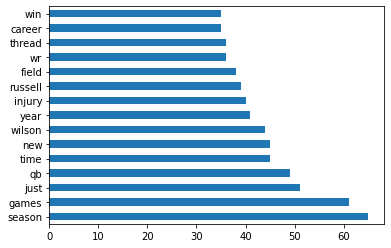

In [71]:
#Most common words
df_cvec.sum().sort_values(ascending =False).head(15).plot.barh();

In [73]:
df.head(10)

,is_nfl,author_fullname,title
0,1,t2_plq2w,post thread cincinnati bengals 23 at baltimore...
1,1,t2_plq2w,thread cincinnati bengals 22 at baltimore rave...
2,1,t2_gbzf7q,cardinals miss the field goal and eagles stay ...
3,1,t2_s82n19zx,roughing the passer called stunning
4,1,t2_gbzf7q,stat muse cooper rush is 50 as a starter only ...
5,1,t2_gbzf7q,tucker kicks the winner for the ravens and the...
6,1,t2_1upx8mh,tucker just called himself a system kicker and...
7,1,t2_5jmky52c,mosher nfc east through 5 eagles 50 cowboys 41...
8,1,t2_gbzf7q,michael lopez using nextgenstats ball tracking...
9,1,t2_slvwr6cu,justin tucker lets the world know whos the man


### Explore title length

In [74]:
#a new column called title_length that contains the length of each status
df['title_length'] = df['title'].str.len()

In [75]:
#a new column called title_word_count that contains the number of words in each status
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['title_word_count'] = df['title'].str.lower().apply(lambda x: len(tokenizer.tokenize(x)))

In [76]:
#  a new column called title_ave_length that contains the sum of the length of all the words and divide it by the total length of the status
df['title_ave_length'] = df['title_word_count']/df['title_length']
df.describe().round(2)

,is_nfl,title_length,title_word_count,title_ave_length
count,1582.00,1582.00,1582.00,1576.00
mean,0.52,77.41,13.88,0.18
std,0.50,62.49,11.55,0.03
min,0.00,0.00,0.00,0.02
25%,0.00,33.00,6.00,0.16
50%,1.00,58.00,10.00,0.18
75%,1.00,98.00,18.00,0.20
max,1.00,287.00,57.00,0.33


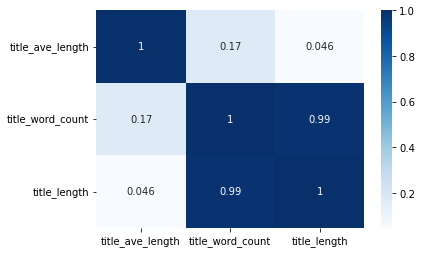

In [77]:
#correlation matrix of 'title_ave_length' 'title_word_count' 'title_length'
df_word = df[['title_ave_length','title_word_count','title_length']].copy()
corr = df_word.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

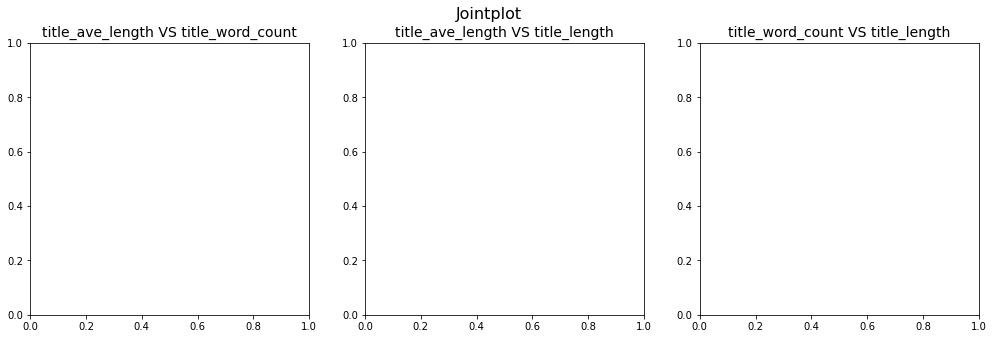

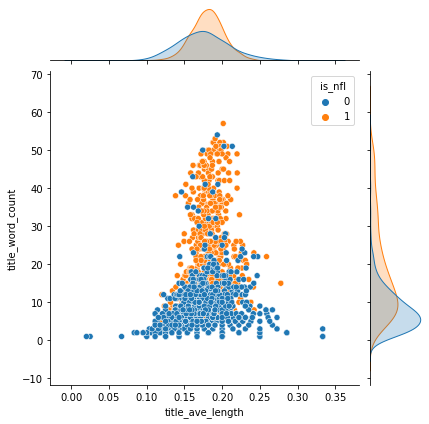

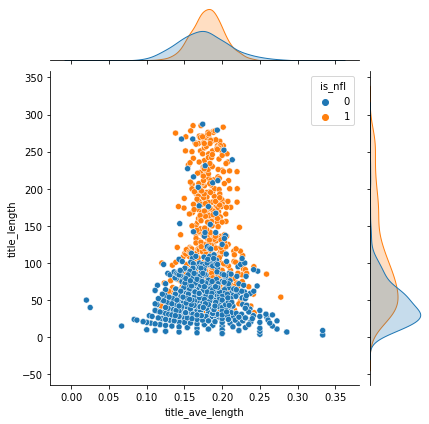

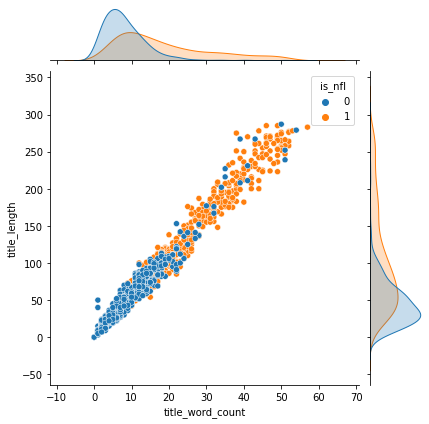

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
ax = ax.ravel() 

fig.suptitle("Jointplot", fontsize=16)
ax[0].set_title('title_ave_length VS title_word_count', fontsize =14)
sns.jointplot(ax=ax[0], data=df, x='title_ave_length', y='title_word_count', hue='is_nfl')

ax[1].set_title('title_ave_length VS title_length', fontsize =14)
sns.jointplot(ax=ax[1], data=df, x='title_ave_length', y='title_length', hue='is_nfl')

ax[2].set_title('title_word_count VS title_length', fontsize =14)
sns.jointplot(ax=ax[2], data=df, x='title_word_count', y='title_length', hue='is_nfl')

plt.show()



In [79]:
#df.groupby(['is_nfl'])['title_length','title_word_count','title_ave_length'].agg(['mean']).round(2)
df.groupby(['is_nfl']).agg(['mean']).round(2)

C:\Users\science01\AppData\Local\Temp\ipykernel_26648\3634890726.py:2: FutureWarning: ['author_fullname', 'title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['is_nfl']).agg(['mean']).round(2)


,title_length,title_word_count,title_ave_length
,mean,mean,mean
is_nfl,,,
0,48.88,8.55,0.18
1,103.91,18.85,0.18


### Exploring authors


In [80]:
df['author_fullname'].nunique()

966

In [81]:
df.shape

(1582, 6)

In [82]:
df1.shape

(1001, 109)

In [83]:
df2.shape

(976, 113)

## Developing baseline model (Using Logistic Regression)

#### Classification numbers of word count using Logistic Regression

In [84]:
# Set X and y
X = df[['title_word_count']]
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [85]:
logreg =LogisticRegression()
logreg.fit(X_train, y_train)
logreg.predict(X_test)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient(s): {logreg.coef_}')
print(f'Testing accuracry: {logreg.score(X_test, y_test)}')

Logistic Regression Intercept: [-1.52417001]
Logistic Regression Coefficient(s): [[0.13038471]]
Testing accuracry: 0.668769716088328


### Classification title post from text using Logistic Regression

In [86]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [87]:
# Gridsearch Vectorizer with Logistic Regression
pipe1 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe1_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid1 = GridSearchCV(pipe1,pipe1_params,cv=5)
grid1.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid1.best_score_}')
print(f'Best params:{grid1.best_params_}')
print('')                                       
# ==========================================================================
pipe2 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe2_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid2 = GridSearchCV(pipe2,pipe2_params,cv=5)
grid2.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid2.best_score_}')
print(f'Best params:{grid2.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.800790513833992
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



### Stemmatization before vectorization

In [88]:
df_stem= df.copy()
df_lemm= df.copy()

In [89]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
def stemming(df):
    return df['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [90]:
stemming(df_stem)

0       post thread cincinnati bengal 23 at baltimor r...
1        thread cincinnati bengal 22 at baltimor raven 22
2       cardin miss the field goal and eagl stay unbeaten
3                              rough the passer call stun
4       stat muse cooper rush is 50 as a starter onli ...
                              ...                        
1577        opportun for foreign student to compet in the
1578    march mad who will win in the websit final fou...
1579               is the 2014 nba draft class now underr
1580                              of cours should be paid
1581                                   can union say nlrb
Name: title, Length: 1582, dtype: object

In [91]:
df_stem.head()

,is_nfl,author_fullname,title,title_length,title_word_count,title_ave_length
0,1,t2_plq2w,post thread cincinnati bengals 23 at baltimore...,56,9,0.160714
1,1,t2_plq2w,thread cincinnati bengals 22 at baltimore rave...,51,8,0.156863
2,1,t2_gbzf7q,cardinals miss the field goal and eagles stay ...,54,9,0.166667
3,1,t2_s82n19zx,roughing the passer called stunning,35,5,0.142857
4,1,t2_gbzf7q,stat muse cooper rush is 50 as a starter only ...,95,21,0.221053


In [92]:
# Set X and y
X = df_stem['title']
y = df_stem['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [93]:
# Gridsearch Vectorizer with Logistic Regression
pipe3 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe3_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid3 = GridSearchCV(pipe3,pipe3_params,cv=5)
grid3.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid3.best_score_}')
print(f'Best params:{grid3.best_params_}')
print('')                                       
# ==========================================================================
pipe4 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe4_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid4 = GridSearchCV(pipe4,pipe4_params,cv=5)
grid4.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid4.best_score_}')
print(f'Best params:{grid4.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.800790513833992
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



### Lemmatization 

In [94]:
from textblob import Word
def lemmatization(df):
     return df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [95]:
lemmatization(df_lemm)

0       post thread cincinnati bengal 23 at baltimore ...
1       thread cincinnati bengal 22 at baltimore raven 22
2       cardinal miss the field goal and eagle stay un...
3                     roughing the passer called stunning
4       stat muse cooper rush is 50 a a starter only t...
                              ...                        
1577    opportunity for foreign student to compete in the
1578    march madness who will win in the website fina...
1579           is the 2014 nba draft class now underrated
1580                             of course should be paid
1581                                can unionize say nlrb
Name: title, Length: 1582, dtype: object

In [96]:
df_lemm.head()

,is_nfl,author_fullname,title,title_length,title_word_count,title_ave_length
0,1,t2_plq2w,post thread cincinnati bengals 23 at baltimore...,56,9,0.160714
1,1,t2_plq2w,thread cincinnati bengals 22 at baltimore rave...,51,8,0.156863
2,1,t2_gbzf7q,cardinals miss the field goal and eagles stay ...,54,9,0.166667
3,1,t2_s82n19zx,roughing the passer called stunning,35,5,0.142857
4,1,t2_gbzf7q,stat muse cooper rush is 50 as a starter only ...,95,21,0.221053


In [97]:
# Set X and y
X = df_lemm['title']
y = df_lemm['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [98]:
#Gridsearch Vectorizer with Logistic Regression
pipe5 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe5_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid5 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid5.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid5.best_score_}')
print(f'Best params:{grid5.best_params_}')
print('')                                       
# ==========================================================================
pipe6 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe6_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid6 = GridSearchCV(pipe6,pipe6_params,cv=5)
grid6.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid6.best_score_}')
print(f'Best params:{grid6.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.800790513833992
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



### Stem and Lemmatize

In [99]:
lemmatization(df_lemm)
stemming(df_lemm)

0       post thread cincinnati bengal 23 at baltimor r...
1        thread cincinnati bengal 22 at baltimor raven 22
2       cardin miss the field goal and eagl stay unbeaten
3                              rough the passer call stun
4       stat muse cooper rush is 50 as a starter onli ...
                              ...                        
1577        opportun for foreign student to compet in the
1578    march mad who will win in the websit final fou...
1579               is the 2014 nba draft class now underr
1580                              of cours should be paid
1581                                   can union say nlrb
Name: title, Length: 1582, dtype: object

In [100]:
df_lemm.head()

,is_nfl,author_fullname,title,title_length,title_word_count,title_ave_length
0,1,t2_plq2w,post thread cincinnati bengals 23 at baltimore...,56,9,0.160714
1,1,t2_plq2w,thread cincinnati bengals 22 at baltimore rave...,51,8,0.156863
2,1,t2_gbzf7q,cardinals miss the field goal and eagles stay ...,54,9,0.166667
3,1,t2_s82n19zx,roughing the passer called stunning,35,5,0.142857
4,1,t2_gbzf7q,stat muse cooper rush is 50 as a starter only ...,95,21,0.221053


In [101]:
# Set X and y
X = df_lemm['title']
y = df_lemm['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [102]:
#Gridsearch Vectorizer with Logistic Regression
pipe7 = Pipeline([('cv', CountVectorizer()),('lr', LogisticRegression())])

pipe7_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid7 = GridSearchCV(pipe5,pipe5_params,cv=5)
grid7.fit(X_train, y_train)
print(f'CountVectorizer+LogisticRegression: {grid7.best_score_}')
print(f'Best params:{grid7.best_params_}')
print('')                                       
# ==========================================================================
pipe8 = Pipeline([('tv', TfidfVectorizer()),('lr', LogisticRegression())])

pipe8_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid8 = GridSearchCV(pipe8,pipe8_params,cv=5)
grid8.fit(X_train, y_train)
print(f'TfidVectorizer+LogisticRegression:  {grid8.best_score_}')
print(f'Best params:{grid8.best_params_}')
print('')

CountVectorizer+LogisticRegression: 0.800790513833992
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}

TfidVectorizer+LogisticRegression:  0.7976284584980238
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': 'english'}



### number of word and bag of word

In [103]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction import DictVectorizer
import pandas as pd
import re

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


df['title_tokens'] = df.title.apply(word_tokenize)

In [104]:
train, test = train_test_split(df, test_size=0.15, random_state=42)

print(train.shape)
print(test.shape)

(1344, 7)
(238, 7)


In [105]:
def featurize_unigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add text length
        feat_dic['LENGTH'] = len(tokens)
    return feat_dic

def featurize_bigram(tokens:list):
    feat_dic = {}
    for i, token in enumerate(tokens):
        ## add unigram
        feat_dic[token] = 1
        ## add bigram
        if i < len(tokens) - 1:
            bigram = '|'.join(tokens[i:i+2]) # e.g. ฉัน|ไป
            feat_dic[bigram] = 1
        ## add text length
        feat_dic['text_length'] = len(tokens)
    return feat_dic

In [106]:
from dis import dis
from matplotlib.pyplot import cla


def train_predict(X_column_name, featurize_function_name, show_confusion_matrix=False, return_model=False):
    ## make X : featurize each record as dictionary
    X_train = train[X_column_name].apply(featurize_function_name)
    X_test = test[X_column_name].apply(featurize_function_name)

    ## make y
    y_train = train['is_nfl']
    y_test = test['is_nfl']

    ## Instantiate DictVectorizer, LogisticRegression
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('logreg', LogisticRegression(max_iter=200))
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['logreg'].classes_ # name of labels

    print(classification_report(y_test, y_pred))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
        disp.plot(xticks_rotation=80)

    # return model
    if return_model:
        return pipe

In [107]:
train_predict('title', featurize_unigram)

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        96
           1       0.80      0.72      0.76       142

    accuracy                           0.73       238
   macro avg       0.72      0.73      0.72       238
weighted avg       0.74      0.73      0.73       238



C:\Users\science01\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Building alternative models

In [108]:
# Set X and y
X = df['title']
y = df['is_nfl']
# Train (80%) Test (20%) split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [109]:
# CountVectorizer with NaiveBayes, and RandomForest
pipe9 = Pipeline([('cv', CountVectorizer()),('mb', MultinomialNB())])

pipe9_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid9 = GridSearchCV(pipe9,pipe9_params,cv=5)
grid9.fit(X_train, y_train)
print(f'CountVectorizer+NaieveBayes:        {grid9.best_score_}')
print(f'Best params:{grid9.best_params_}')
print('')
# ==========================================================================
pipe10 = Pipeline([('cv', CountVectorizer()),('rf', RandomForestClassifier())])

pipe10_params = {'cv__max_features': [5,10,25,50,100],
                'cv__stop_words':   [None,'english'],
                'cv__ngram_range':  [(1,1),(1,2)],
              } 

grid10 = GridSearchCV(pipe10,pipe10_params,cv=5)
grid10.fit(X_train, y_train)
print(f'CountVectorizer+RandomForest:        {grid10.best_score_}')
print(f'Best params:{grid10.best_params_}')

CountVectorizer+NaieveBayes:        0.6774703557312252
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': None}

CountVectorizer+RandomForest:        0.7944664031620553
Best params:{'cv__max_features': 100, 'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}


In [111]:
# TfidVectorizer with Logistic Regression, NaiveBayes, and RandomForest
pipe11 = Pipeline([('tv', TfidfVectorizer()),('mb', MultinomialNB())])

pipe11_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid11 = GridSearchCV(pipe11,pipe11_params,cv=5)
grid11.fit(X_train, y_train)
print(f'TfidVectorizer+NaieveBayes:         {grid11.best_score_}')
print(f'Best params:{grid11.best_params_}')
print('')
# ==========================================================================
pipe11 = Pipeline([('tv', TfidfVectorizer()),('rf', RandomForestClassifier())])

pipe11_params = {'tv__max_features': [5,10,25,50,100],
                'tv__stop_words':   [None,'english'],
                'tv__ngram_range':  [(1,1),(1,2)],
              } 

grid11 = GridSearchCV(pipe11,pipe11_params,cv=5)
grid11.fit(X_train, y_train)
print(f'TfidVectorizer+RandomForest:         {grid11.best_score_}')
print(f'Best params:{grid11.best_params_}')
print('')

TfidVectorizer+NaieveBayes:         0.6774703557312253
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 1), 'tv__stop_words': None}

TfidVectorizer+RandomForest:         0.7952569169960475
Best params:{'tv__max_features': 100, 'tv__ngram_range': (1, 2), 'tv__stop_words': 'english'}



In [112]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [113]:
cvec = CountVectorizer()
X_train = cvec.fit_transform(X_train)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1265, 4319), (317,), (1265,), (317,))

In [115]:
X_train

<1265x4319 sparse matrix of type '<class 'numpy.int64'>'
	with 15697 stored elements in Compressed Sparse Row format>

In [117]:
X_train = X_train.todense()

In [118]:
X_train

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [120]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_scores

,model,best_score,best_params
0,svm,0.886166,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.812648,{'n_estimators': 5}
2,logistic_regression,0.888538,{'C': 10}
3,naive_bayes_gaussian,0.883004,{}
4,naive_bayes_multinomial,0.901976,{}
5,decision_tree,0.773123,{'criterion': 'entropy'}
